In [2]:
import pandas as pd

df = pd.read_csv("/Users/siriduggineni/Downloads/AirQualityUCI.csv", delimiter=";")

print("Main statistics about the dataset:")
print(df.describe())

Main statistics about the dataset:
       PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  Unnamed: 15  Unnamed: 16  
count  9357.000000   9357.000000  9357.000000          0.0          0.0  
mean     58.148873   1391.479641   975.072032          NaN          NaN  
std     126.940455    467.210125   456.938184    

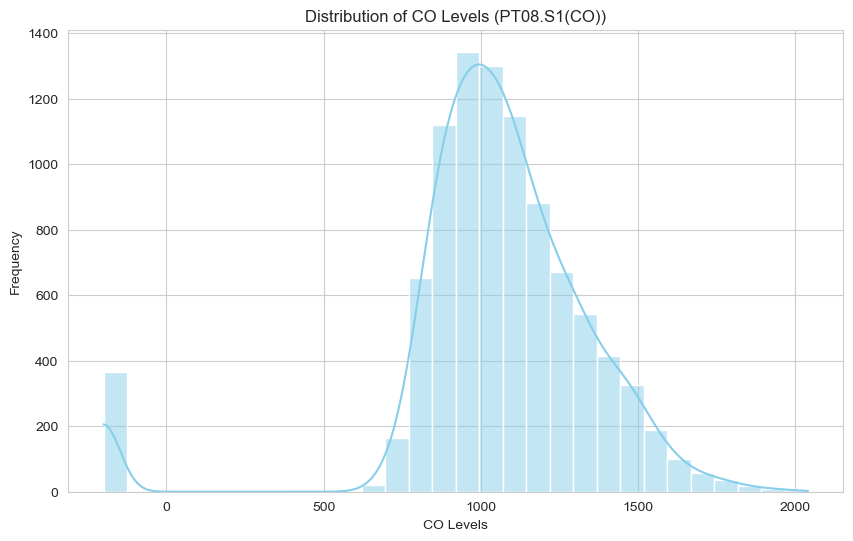

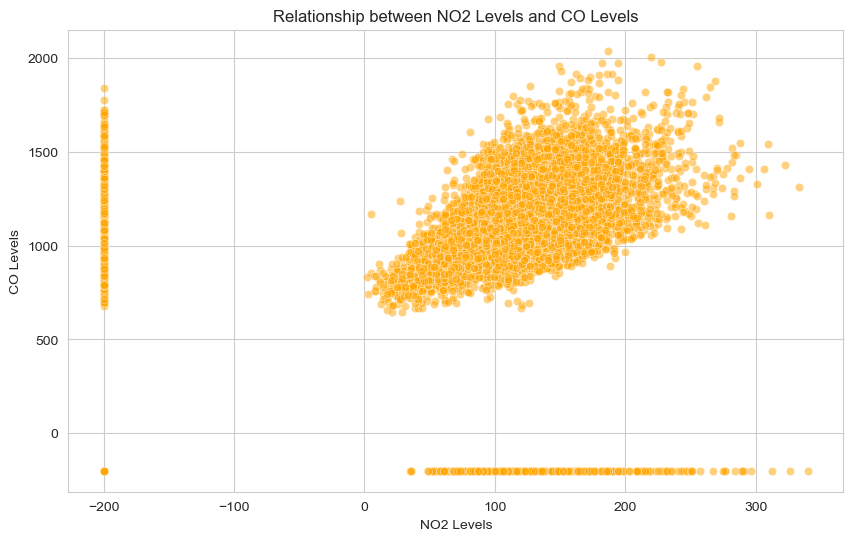

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['PT08.S1(CO)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of CO Levels (PT08.S1(CO))')
plt.xlabel('CO Levels')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2(GT)', y='PT08.S1(CO)', data=df, alpha=0.5, color='orange')
plt.title('Relationship between NO2 Levels and CO Levels')
plt.xlabel('NO2 Levels')
plt.ylabel('CO Levels')
plt.show()

In [4]:
print(df.isnull().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [5]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [6]:
print(df.isnull().sum())

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64


In [7]:

numeric_columns = df.select_dtypes(include=['float64', 'int64'])


In [8]:
print(numeric_columns)

      PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0          1360.0     150.0         1046.0    166.0        1056.0    113.0   
1          1292.0     112.0          955.0    103.0        1174.0     92.0   
2          1402.0      88.0          939.0    131.0        1140.0    114.0   
3          1376.0      80.0          948.0    172.0        1092.0    122.0   
4          1272.0      51.0          836.0    131.0        1205.0    116.0   
...           ...       ...            ...      ...           ...      ...   
9466          NaN       NaN            NaN      NaN           NaN      NaN   
9467          NaN       NaN            NaN      NaN           NaN      NaN   
9468          NaN       NaN            NaN      NaN           NaN      NaN   
9469          NaN       NaN            NaN      NaN           NaN      NaN   
9470          NaN       NaN            NaN      NaN           NaN      NaN   

      PT08.S4(NO2)  PT08.S5(O3)  
0           1692.0       1268

In [9]:
df.dropna(inplace=True)

In [10]:
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [11]:
df.shape

(9357, 15)

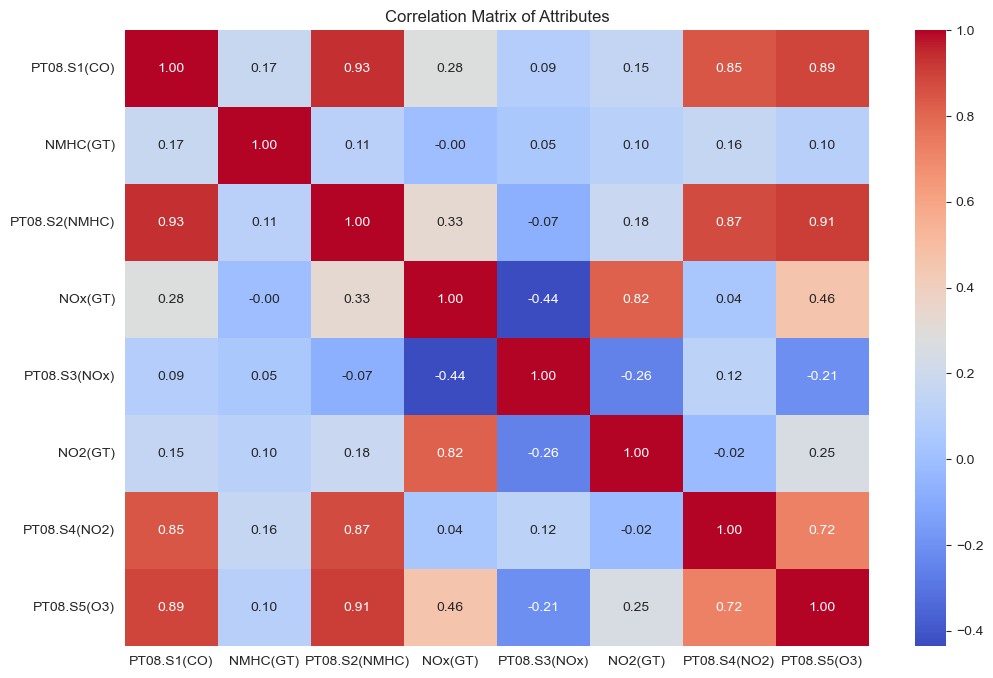

In [12]:
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Attributes')
plt.show()


In [13]:

print(df.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,786

In [14]:
columns_to_clean = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
df[columns_to_clean] = df[columns_to_clean].replace(',', '.', regex=True)

df[columns_to_clean] = df[columns_to_clean].astype(float)


In [15]:
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [16]:
df.shape


(9357, 15)

In [17]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
target_column = 'PT08.S5(O3)'
column_number = df.columns.get_loc('PT08.S5(O3)')
X = np.delete(df, column_number, axis=1)
y = df[target_column]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (7485, 12) (7485,)
Testing set shape: (936, 12) (936,)
Validation set shape: (936, 12) (936,)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SpatialDropout1D,Embedding
from keras.callbacks import ModelCheckpoint
from keras.layers import SimpleRNN, Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
model = Sequential([
    SimpleRNN(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])

model.compile(optimizer=SGD(), loss='mean_squared_error')

history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val_reshaped, y_val),
                    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

test_loss = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {test_loss:.4f}')

y_pred = model.predict(X_test_reshaped)



Epoch 1/50
234/234 [==============================] - 1s 2ms/step - loss: 54277.4844 - val_loss: 28385.3652
Epoch 2/50
234/234 [==============================] - 0s 1ms/step - loss: 29241.6562 - val_loss: 30019.6758
Epoch 3/50
234/234 [==============================] - 0s 2ms/step - loss: 30211.1719 - val_loss: 30007.8633
Epoch 4/50
234/234 [==============================] - 0s 1ms/step - loss: 28344.1641 - val_loss: 23348.2676
Epoch 5/50
234/234 [==============================] - 0s 1ms/step - loss: 24287.0586 - val_loss: 25214.6719
Epoch 6/50
234/234 [==============================] - 0s 2ms/step - loss: 24050.1855 - val_loss: 25324.4414
Epoch 7/50
234/234 [==============================] - 0s 2ms/step - loss: 24370.2695 - val_loss: 26833.9727
Epoch 8/50
234/234 [==============================] - 0s 2ms/step - loss: 23345.6895 - val_loss: 24149.6855
Epoch 9/50
30/30 [==============================] - 0s 763us/step - loss: 23013.3359
Test Loss: 23013.3359
30/30 [======================

In [28]:
from sklearn.metrics import r2_score 
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.4f}')


R2 Score: 0.8906
